In [1]:


import yfinance as yf
import pandas as pd
import numpy as np

nifty50_tickers = [
    'ADANIENT.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS',
    'BAJAJFINSV.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS',
    'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS',
    'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
    'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS',
    'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
    'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS',
    'SBILIFE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS',
    'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'
]

start_date = "2015-01-01"
end_date = "2025-05-01"

returns_summary = []

for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close']]
        data.dropna(inplace=True)

        # Buy at T-1 close, sell at T open
        data['Overnight_Return'] = data['Open'] / data['Close'].shift(1) - 1
        data.dropna(inplace=True)

        cumulative_return = (1 + data['Overnight_Return']).prod() - 1
        returns_summary.append({
            'Ticker': ticker,
            'Overnight Strategy Return (%)': cumulative_return * 100
        })
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

df = pd.DataFrame(returns_summary)
df.to_csv("nifty50_overnight_strategy_summary_25years.csv", index=False)
df.head()


YF.download() has changed argument auto_adjust default to True


,Ticker,Overnight Strategy Return (%)
0,ADANIENT.NS,46859.764141
1,ASIANPAINT.NS,2673.588697
2,AXISBANK.NS,1727.854775
3,BAJAJ-AUTO.NS,1695.314504
4,BAJFINANCE.NS,21238.199111


In [9]:
returns_summary = []

for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close']]
        data.dropna(inplace=True)

        # Buy at the open, sell at the close
        data['Day_Return'] = data['Close'] / data['Open'] - 1
        data.dropna(inplace=True)

        cumulative_return = (1 + data['Day_Return']).prod() - 1
        returns_summary.append({
            'Ticker': ticker,
            'Day Strategy Return (%)': cumulative_return * 100
        })
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

df = pd.DataFrame(returns_summary)
df.to_csv("nifty50_day_strategy_summary_25years.csv", index=False)
df.head()

<ipython-input-9-31558308aa8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-9-31558308aa8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day_Return'] = data['Close'] / data['Open'] - 1
<ipython-input-9-31558308aa8e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,Ticker,Day Strategy Return (%)
0,ADANIENT.NS,-92.995709
1,ASIANPAINT.NS,-87.462537
2,AXISBANK.NS,-86.673844
3,BAJAJ-AUTO.NS,-76.155594
4,BAJFINANCE.NS,-88.032912


In [2]:
metrics_summary = []

for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close']]
        data.dropna(inplace=True)
        data['Overnight_Return'] = data['Open'] / data['Close'].shift(1) - 1
        data.dropna(inplace=True)

        # Risk-free rate (annual) = 6.9%, converted to daily
        annual_rf = 0.069
        daily_rf = (1 + annual_rf) ** (1 / 252) - 1

        # Sharpe Ratio
        daily_sharpe = (data['Overnight_Return'].mean() - daily_rf) / data['Overnight_Return'].std()
        annualized_sharpe = daily_sharpe * np.sqrt(252)

        # Max Drawdown
        cumulative = (1 + data['Overnight_Return']).cumprod()
        peak = cumulative.cummax()
        drawdown = (cumulative - peak) / peak
        max_drawdown = drawdown.min()

        # Average Winning Return
        avg_win = data[data['Overnight_Return'] > 0]['Overnight_Return'].mean()
        avg_loss = data[data['Overnight_Return'] < 0]['Overnight_Return'].mean()

        # Win Rate
        win_days = (data['Overnight_Return'] > 0).sum()
        total_days = data['Overnight_Return'].count()
        win_rate = win_days / total_days

        # Store
        metrics_summary.append({
            'Ticker': ticker,
            'Sharpe Ratio': round(annualized_sharpe, 2),
            'Max Drawdown (%)': round(max_drawdown * 100, 2),
            'Avg Winning Return (%)': round(avg_win * 100, 2),
            'Avg Losing Return (%)': round(avg_loss * 100, 2),
            'Win Rate (%)': round(win_rate * 100, 2)
        })

    except Exception as e:
        print(f"Error in {ticker}: {e}")

In [3]:
df_metrics = pd.DataFrame(metrics_summary)
df_metrics.to_csv("nifty50_overnight_strategy_metrics_25years_3.csv", index=False)
df_metrics.head()


,Ticker,Sharpe Ratio,Max Drawdown (%),Avg Winning Return (%),Avg Losing Return (%),Win Rate (%)
0,ADANIENT.NS,0.92,-43.36,0.85,-0.84,66.78
1,ASIANPAINT.NS,2.33,-18.97,0.46,-0.48,64.94
2,AXISBANK.NS,1.42,-32.11,0.61,-0.66,61.29
3,BAJAJ-AUTO.NS,2.11,-19.64,0.42,-0.44,64.39
4,BAJFINANCE.NS,3.02,-32.93,0.61,-0.64,68.71


In [4]:
individual_returns = []

# Iterate through each ticker
for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close']]
        data.dropna(inplace=True)

        # Calculate overnight returns
        data['Overnight_Return'] = data['Open'] / data['Close'].shift(1) - 1
        data.dropna(inplace=True)

        # Append the individual stock returns for further calculation
        individual_returns.append(data['Overnight_Return'])

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Convert individual returns to a DataFrame
returns_df = pd.DataFrame(individual_returns).T  # Transpose to align returns for each day
returns_df.columns = nifty50_tickers  # Assign the correct tickers as column names

# Now, calculate the portfolio return by taking the average of all stocks for each day
# Assume equal capital allocation to each stock
portfolio_returns = returns_df.mean(axis=1)

# Calculate the cumulative portfolio return
cumulative_return = (1 + portfolio_returns).prod() - 1

# Display portfolio returns summary
print(f"Cumulative Portfolio Return: {cumulative_return * 100:.2f}%")

# Save the individual returns and cumulative return to a CSV file


Cumulative Portfolio Return: 4639.46%


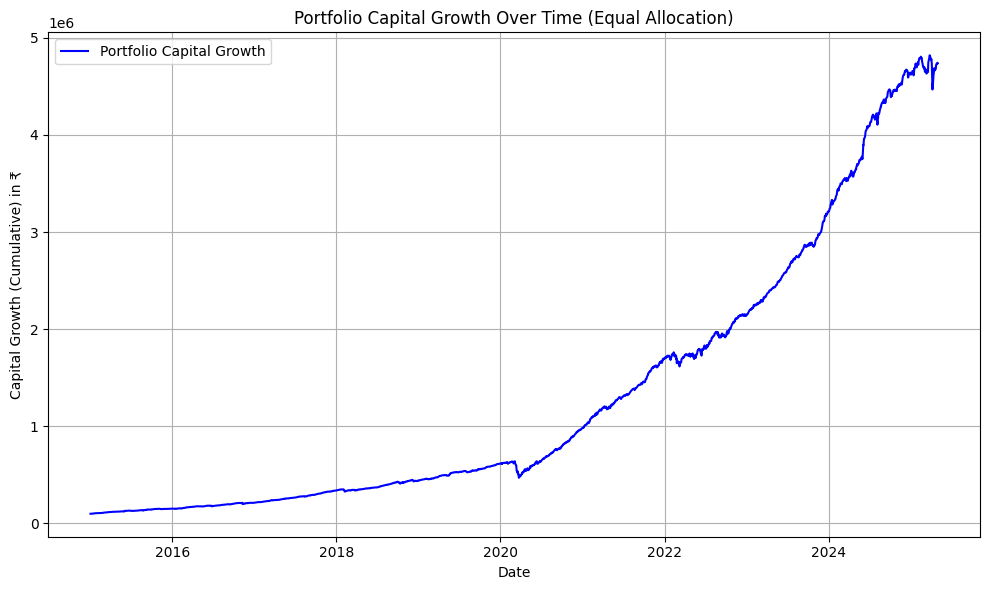

In [5]:
initial_investment = 100000
capital_growth = initial_investment * (1 + portfolio_returns).cumprod()

import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(capital_growth, label='Portfolio Capital Growth', color='b')
plt.title('Portfolio Capital Growth Over Time (Equal Allocation)')
plt.xlabel('Date')
plt.ylabel('Capital Growth (Cumulative) in ₹')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()

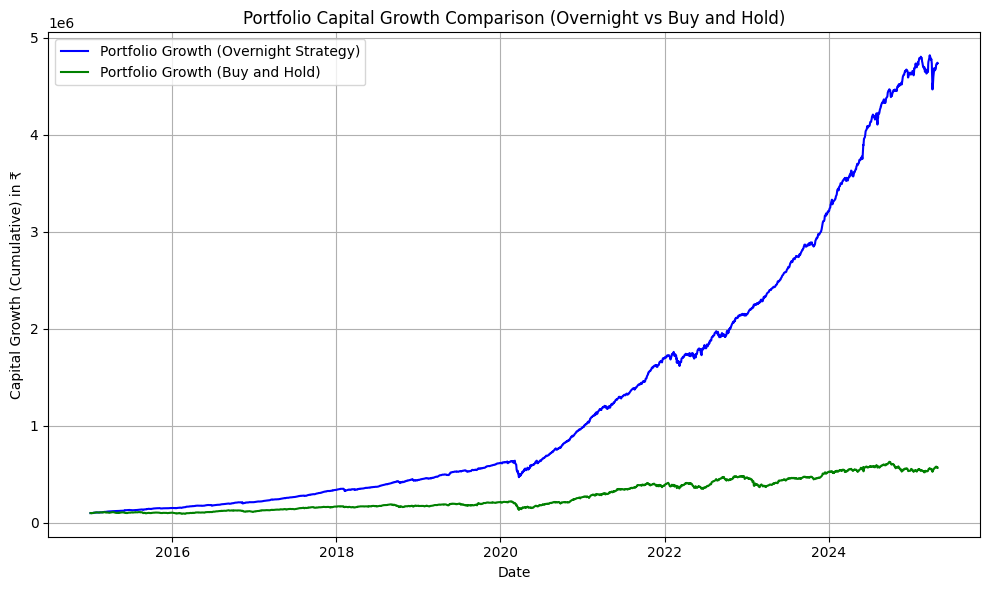

In [8]:
# Calculate buy-and-hold growth for each stock over time
buy_and_hold_growth = pd.DataFrame(index=returns_df.index)

for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Close']]
        data.dropna(inplace=True)

        # Calculate daily returns for buy-and-hold strategy (percentage change)
        data['Daily_Return'] = data['Close'] / data['Close'].shift(1) - 1
        data.dropna(inplace=True)

        # Multiply to get cumulative growth (buy and hold)
        data['Buy_and_Hold_Growth'] = (1 + data['Daily_Return']).cumprod()

        buy_and_hold_growth[ticker] = data['Buy_and_Hold_Growth']

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Now, calculate the portfolio growth by taking the average of all stocks for each day (equal-weighted)
buy_and_hold_portfolio_growth = buy_and_hold_growth.mean(axis=1)

# Calculate the final portfolio growth based on initial investment
buy_and_hold_final_growth = buy_and_hold_portfolio_growth * initial_investment

# Now plot both strategies
plt.figure(figsize=(10, 6))

# Plot overnight strategy portfolio growth
plt.plot(capital_growth, label='Portfolio Growth (Overnight Strategy)', color='b')

# Plot buy-and-hold strategy portfolio growth (all stocks held from start to end)
plt.plot(buy_and_hold_final_growth, label='Portfolio Growth (Buy and Hold)', color='g')

plt.title('Portfolio Capital Growth Comparison (Overnight vs Buy and Hold)')
plt.xlabel('Date')
plt.ylabel('Capital Growth (Cumulative) in ₹')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()


<ipython-input-10-67304a47ab81>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-10-67304a47ab81>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day_Return'] = data['Close'] / data['Open'] - 1
<ipython-input-10-67304a47ab81>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-10-67304a47ab81

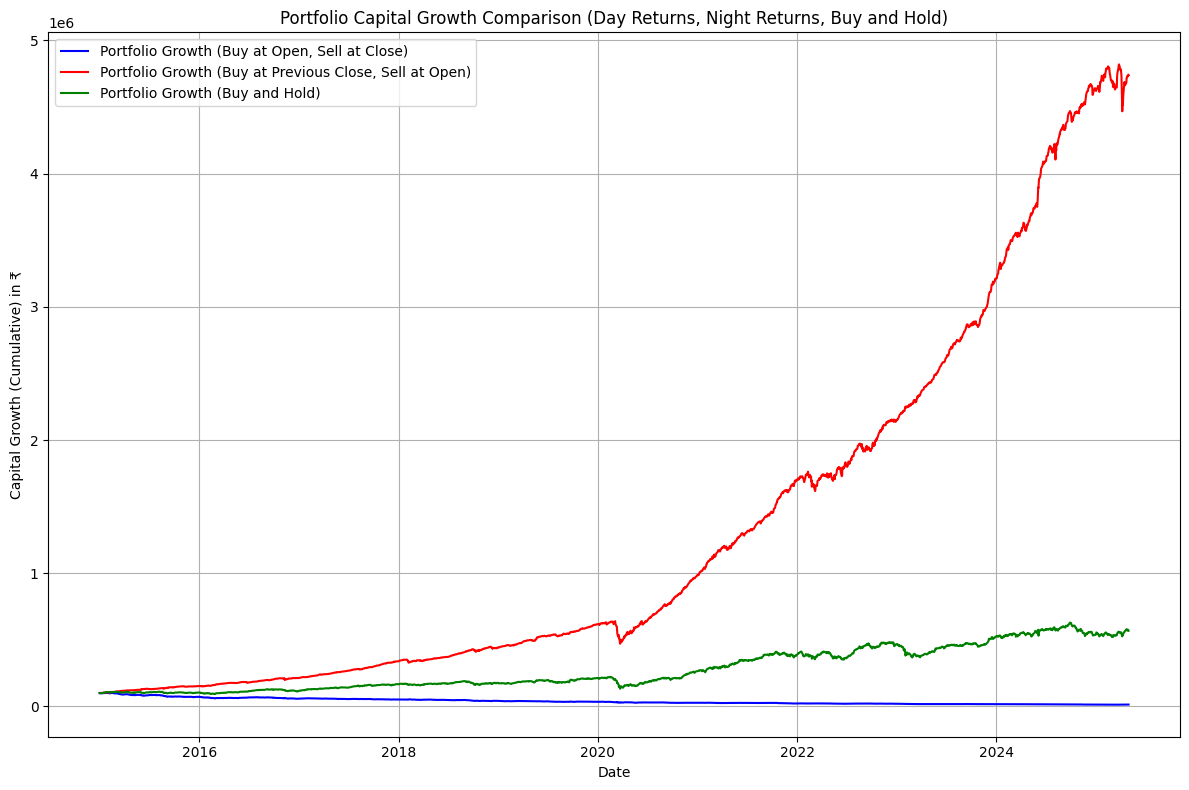

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nifty50_tickers = [
    'ADANIENT.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS',
    'BAJAJFINSV.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS',
    'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS',
    'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
    'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS',
    'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
    'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS',
    'SBILIFE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS',
    'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'
]

start_date = "2015-01-01"
end_date = "2025-05-01"

# Store day returns for each stock
individual_day_returns = []
individual_night_returns = []

# Loop through all tickers and calculate day and night returns
for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close']]
        data.dropna(inplace=True)

        # Buy at the open, sell at the close (Day Return)
        data['Day_Return'] = data['Close'] / data['Open'] - 1
        data.dropna(inplace=True)
        individual_day_returns.append(data['Day_Return'])

        # Buy at the previous day's close, sell at the open (Night Return)
        data['Night_Return'] = data['Open'] / data['Close'].shift(1) - 1
        data.dropna(inplace=True)
        individual_night_returns.append(data['Night_Return'])

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Convert individual returns into a DataFrame
day_returns_df = pd.DataFrame(individual_day_returns).T
night_returns_df = pd.DataFrame(individual_night_returns).T
day_returns_df.columns = nifty50_tickers
night_returns_df.columns = nifty50_tickers

# Calculate the portfolio returns by averaging returns of all stocks for each day (equal allocation)
day_portfolio_returns = day_returns_df.mean(axis=1)
night_portfolio_returns = night_returns_df.mean(axis=1)

# Calculate the buy-and-hold returns for each stock (from open to close)
buy_and_hold_returns = []
buy_and_hold_growth = pd.DataFrame(index=day_returns_df.index)

for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close']]
        data.dropna(inplace=True)

        # Calculate daily returns for buy-and-hold strategy (percentage change)
        data['Daily_Return'] = data['Close'] / data['Close'].shift(1) - 1
        data.dropna(inplace=True)

        # Multiply to get cumulative growth (buy and hold)
        data['Buy_and_Hold_Growth'] = (1 + data['Daily_Return']).cumprod()

        buy_and_hold_growth[ticker] = data['Buy_and_Hold_Growth']
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Calculate the portfolio growth by taking the average of all stocks for each day (equal-weighted)
buy_and_hold_portfolio_growth = buy_and_hold_growth.mean(axis=1)

# Calculate cumulative portfolio returns for all strategies
day_cumulative_return = (1 + day_portfolio_returns).cumprod() - 1
night_cumulative_return = (1 + night_portfolio_returns).cumprod() - 1
buy_and_hold_cumulative_return = buy_and_hold_portfolio_growth - 1

# Calculate portfolio value (assuming initial investment of ₹100,000)
initial_investment = 100000
day_capital_growth = initial_investment * (1 + day_cumulative_return)
night_capital_growth = initial_investment * (1 + night_cumulative_return)
buy_and_hold_capital_growth = initial_investment * (1 + buy_and_hold_cumulative_return)

# Plotting all strategies
plt.figure(figsize=(12, 8))

# Plot day returns portfolio growth
plt.plot(day_capital_growth, label='Portfolio Growth (Buy at Open, Sell at Close)', color='b')

# Plot night returns portfolio growth
plt.plot(night_capital_growth, label='Portfolio Growth (Buy at Previous Close, Sell at Open)', color='r')

# Plot buy and hold portfolio growth
plt.plot(buy_and_hold_capital_growth, label='Portfolio Growth (Buy and Hold)', color='g')

plt.title('Portfolio Capital Growth Comparison (Day Returns, Night Returns, Buy and Hold)')
plt.xlabel('Date')
plt.ylabel('Capital Growth (Cumulative) in ₹')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()


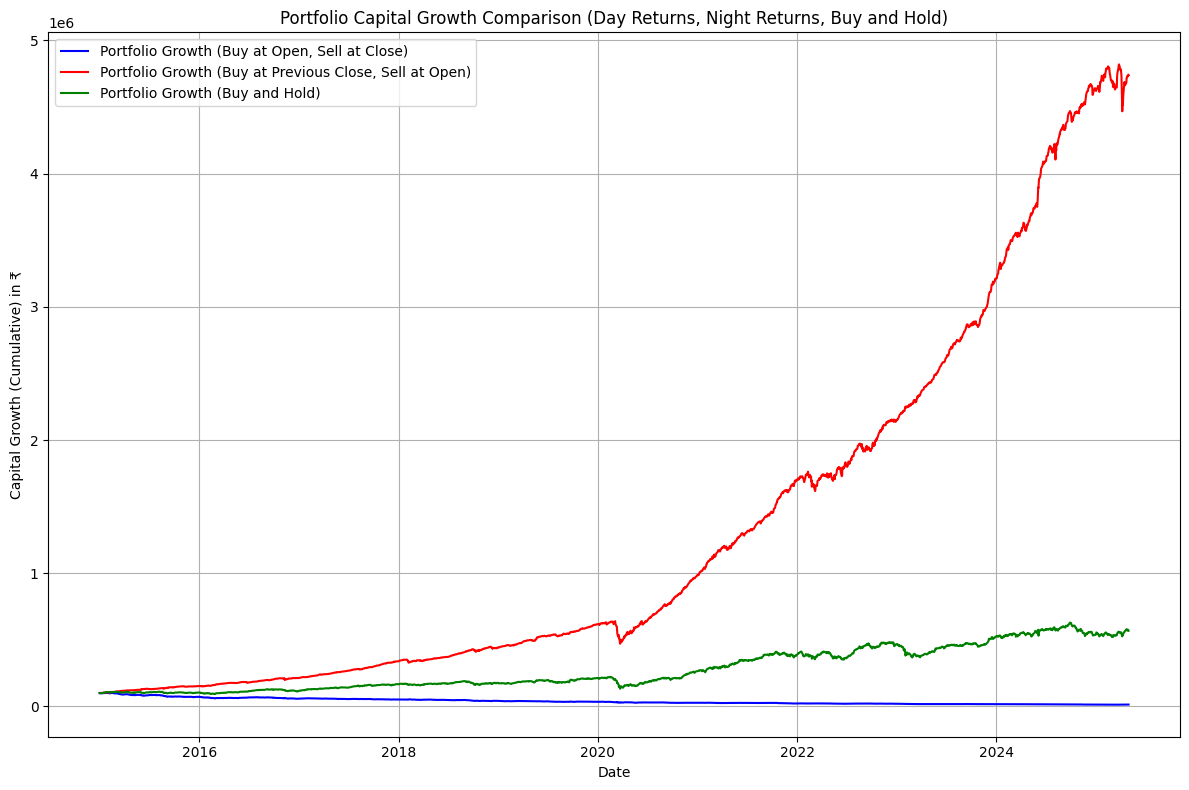

Total Returns (Day Strategy): -86.17%
Total Returns (Night Strategy): 4639.46%
Total Returns (Buy and Hold): 467.80%
Annualized Returns (Day Strategy): -17.42%
Annualized Returns (Night Strategy): 45.25%
Annualized Returns (Buy and Hold): 18.29%


<ipython-input-11-b4f177f40b95>:113: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  day_total_return = day_cumulative_return[-1] * 100
<ipython-input-11-b4f177f40b95>:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  night_total_return = night_cumulative_return[-1] * 100
<ipython-input-11-b4f177f40b95>:115: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_and_hold_total_return = buy_and_hold_cumulative_return[-1] * 100
<ipython-inp

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nifty50_tickers = [
    'ADANIENT.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS',
    'BAJAJFINSV.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS',
    'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS',
    'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
    'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS',
    'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
    'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS',
    'SBILIFE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS',
    'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'
]

start_date = "2015-01-01"
end_date = "2025-05-01"

# Store day returns for each stock
individual_day_returns = []
individual_night_returns = []

# Loop through all tickers and calculate day and night returns
for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close']]
        data.dropna(inplace=True)

        # Buy at the open, sell at the close (Day Return)
        data['Day_Return'] = data['Close'] / data['Open'] - 1
        data.dropna(inplace=True)
        individual_day_returns.append(data['Day_Return'])

        # Buy at the previous day's close, sell at the open (Night Return)
        data['Night_Return'] = data['Open'] / data['Close'].shift(1) - 1
        data.dropna(inplace=True)
        individual_night_returns.append(data['Night_Return'])

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Convert individual returns into a DataFrame
day_returns_df = pd.DataFrame(individual_day_returns).T
night_returns_df = pd.DataFrame(individual_night_returns).T
day_returns_df.columns = nifty50_tickers
night_returns_df.columns = nifty50_tickers

# Calculate the portfolio returns by averaging returns of all stocks for each day (equal allocation)
day_portfolio_returns = day_returns_df.mean(axis=1)
night_portfolio_returns = night_returns_df.mean(axis=1)

# Calculate the buy-and-hold returns for each stock (from open to close)
buy_and_hold_returns = []
buy_and_hold_growth = pd.DataFrame(index=day_returns_df.index)

for ticker in nifty50_tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)[['Open', 'Close']]
        data.dropna(inplace=True)

        # Calculate daily returns for buy-and-hold strategy (percentage change)
        data['Daily_Return'] = data['Close'] / data['Close'].shift(1) - 1
        data.dropna(inplace=True)

        # Multiply to get cumulative growth (buy and hold)
        data['Buy_and_Hold_Growth'] = (1 + data['Daily_Return']).cumprod()

        buy_and_hold_growth[ticker] = data['Buy_and_Hold_Growth']
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Calculate the portfolio growth by taking the average of all stocks for each day (equal-weighted)
buy_and_hold_portfolio_growth = buy_and_hold_growth.mean(axis=1)

# Calculate cumulative portfolio returns for all strategies
day_cumulative_return = (1 + day_portfolio_returns).cumprod() - 1
night_cumulative_return = (1 + night_portfolio_returns).cumprod() - 1
buy_and_hold_cumulative_return = buy_and_hold_portfolio_growth - 1

# Calculate portfolio value (assuming initial investment of ₹100,000)
initial_investment = 100000
day_capital_growth = initial_investment * (1 + day_cumulative_return)
night_capital_growth = initial_investment * (1 + night_cumulative_return)
buy_and_hold_capital_growth = initial_investment * (1 + buy_and_hold_cumulative_return)

# Plotting all strategies
plt.figure(figsize=(12, 8))

# Plot day returns portfolio growth
plt.plot(day_capital_growth, label='Portfolio Growth (Buy at Open, Sell at Close)', color='b')

# Plot night returns portfolio growth
plt.plot(night_capital_growth, label='Portfolio Growth (Buy at Previous Close, Sell at Open)', color='r')

# Plot buy and hold portfolio growth
plt.plot(buy_and_hold_capital_growth, label='Portfolio Growth (Buy and Hold)', color='g')

plt.title('Portfolio Capital Growth Comparison (Day Returns, Night Returns, Buy and Hold)')
plt.xlabel('Date')
plt.ylabel('Capital Growth (Cumulative) in ₹')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()

# Print the returns for all strategies

# Calculate the total return for each strategy
day_total_return = day_cumulative_return[-1] * 100
night_total_return = night_cumulative_return[-1] * 100
buy_and_hold_total_return = buy_and_hold_cumulative_return[-1] * 100

# Calculate the annualized return for each strategy
days_in_period = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days
day_annualized_return = ((1 + day_cumulative_return[-1]) ** (365 / days_in_period)) - 1
night_annualized_return = ((1 + night_cumulative_return[-1]) ** (365 / days_in_period)) - 1
buy_and_hold_annualized_return = ((1 + buy_and_hold_cumulative_return[-1]) ** (365 / days_in_period)) - 1

# Print total returns and annualized returns
print(f"Total Returns (Day Strategy): {day_total_return:.2f}%")
print(f"Total Returns (Night Strategy): {night_total_return:.2f}%")
print(f"Total Returns (Buy and Hold): {buy_and_hold_total_return:.2f}%")

print(f"Annualized Returns (Day Strategy): {day_annualized_return * 100:.2f}%")
print(f"Annualized Returns (Night Strategy): {night_annualized_return * 100:.2f}%")
print(f"Annualized Returns (Buy and Hold): {buy_and_hold_annualized_return * 100:.2f}%")


In [26]:
risk_free_rate = 0.069  # Assuming the risk-free rate is 0 (you can adjust this if needed)
excess_returns = portfolio_returns - risk_free_rate  # Subtract the risk-free rate from portfolio returns
sharpe_ratio = excess_returns.mean() / excess_returns.std()  # Mean excess return / std deviation of returns

# --- Maximum Drawdown Calculation ---
# Calculate the rolling maximum value of the portfolio over time
rolling_max = capital_growth.cummax()

# Calculate the drawdown
drawdown = (capital_growth - rolling_max) / rolling_max

# Find the maximum drawdown
max_drawdown = drawdown.min()

In [27]:
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

Sharpe Ratio: -10.7980
Maximum Drawdown: -26.54%
